In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
ad = sc.read_h5ad('../../data/talbot_xenium.h5ad')
ad = ad[ad.obs.tissue == 'skin']
ad

View of AnnData object with n_obs × n_vars = 223359 × 5006
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'run', 'sample_folder', 'sample___', 'condition', 'tissue', 'genotype', 'timepoint', 'seg_method_short', 'n_genes_by_counts', 'sample_id'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'

In [3]:
ad.layers['raw'] = ad.X.copy()

In [4]:
sc.pp.calculate_qc_metrics(ad, percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(ad,min_counts=30)
sc.pp.filter_cells(ad,min_genes=10)

In [5]:
sc.pp.normalize_total(ad, inplace=True,target_sum=100)
sc.pp.log1p(ad)

In [12]:
list(ad.obs.sample_id.unique())

['output-XETG00045__0059976__litt_24h__20250725__091031_1',
 'output-XETG00045__0059976__litt_24h__20250725__091031_2',
 'output-XETG00045__0059976__litt_24h__20250725__091031_0',
 'output-XETG00045__0059976__litt_72h__20250725__091031_1',
 'output-XETG00045__0059976__litt_72h__20250725__091031_2',
 'output-XETG00045__0059976__litt_72h__20250725__091031_0',
 'output-XETG00045__0059976__cre_72h__20250725__091031_2',
 'output-XETG00045__0059976__cre_72h__20250725__091031_1',
 'output-XETG00045__0059976__cre_72h__20250725__091031_0',
 'output-XETG00045__0059976__wt_72h__20250725__091031_2',
 'output-XETG00045__0059976__wt_72h__20250725__091031_1',
 'output-XETG00045__0059976__wt_72h__20250725__091031_0',
 'output-XETG00045__0059976__cre_24h__20250725__091031_0',
 'output-XETG00045__0059976__cre_24h__20250725__091031_1',
 'output-XETG00045__0059976__cre_24h__20250725__091031_2',
 'output-XETG00045__0059976__wt_24h__20250725__091031_1',
 'output-XETG00045__0059976__wt_24h__20250725__091031_

In [14]:
comparisons = {
    # ---------- 24h ----------
    "cre_24h_vs_litt_24h": {
        "case": [
            "output-XETG00045__0059976__cre_24h__20250725__091031"  # samples 1,2,11 collapsed
        ],
        "control": [
            "output-XETG00045__0059976__litt_24h__20250725__091031" # samples 3,4,12 collapsed
        ],
    },
    "cre_24h_vs_wt_24h": {
        "case": [
            "output-XETG00045__0059976__cre_24h__20250725__091031"
        ],
        "control": [
            "output-XETG00045__0059976__wt_24h__20250725__091031"   # samples 5,13 collapsed
        ],
    },
    "litt_24h_vs_wt_24h": {
        "case": [
            "output-XETG00045__0059976__litt_24h__20250725__091031"
        ],
        "control": [
            "output-XETG00045__0059976__wt_24h__20250725__091031"
        ],
    },

    # ---------- 72h ----------
    "cre_72h_vs_litt_72h": {
        "case": [
            "output-XETG00045__0059976__cre_72h__20250725__091031"  # samples 6,8,14 collapsed
        ],
        "control": [
            "output-XETG00045__0059976__litt_72h__20250725__091031" # samples 7,9 collapsed
        ],
    },
    "cre_72h_vs_wt_72h": {
        "case": [
            "output-XETG00045__0059976__cre_72h__20250725__091031"
        ],
        "control": [
            "output-XETG00045__0059976__wt_72h__20250725__091031"   # samples 10,15,16 collapsed
        ],
    },
    "litt_72h_vs_wt_72h": {
        "case": [
            "output-XETG00045__0059976__litt_72h__20250725__091031"
        ],
        "control": [
            "output-XETG00045__0059976__wt_72h__20250725__091031"
        ],
    },
}

In [18]:
# 1) map each file prefix to a condition label
file_to_condition = {
    "output-XETG00045__0059976__litt_24h__20250725__091031": "litt_24h",
    "output-XETG00045__0059976__cre_24h__20250725__091031":  "cre_24h",
    "output-XETG00045__0059976__wt_24h__20250725__091031":   "wt_24h",
    "output-XETG00045__0059976__litt_72h__20250725__091031": "litt_72h",
    "output-XETG00045__0059976__cre_72h__20250725__091031":  "cre_72h",
    "output-XETG00045__0059976__wt_72h__20250725__091031":   "wt_72h",
}

# add condition column (assuming your obs column has the sample_id strings)
ad.obs["condition"] = ad.obs["sample___"].map(file_to_condition)

# 2) define comparisons by condition
comparisons = {
    # ---------- 24h ----------
    "cre_24h_vs_litt_24h": {
        "case":    ["cre_24h"],
        "control": ["litt_24h"],
    },
    "cre_24h_vs_wt_24h": {
        "case":    ["cre_24h"],
        "control": ["wt_24h"],
    },
    "litt_24h_vs_wt_24h": {
        "case":    ["litt_24h"],
        "control": ["wt_24h"],
    },

    # ---------- 72h ----------
    "cre_72h_vs_litt_72h": {
        "case":    ["cre_72h"],
        "control": ["litt_72h"],
    },
    "cre_72h_vs_wt_72h": {
        "case":    ["cre_72h"],
        "control": ["wt_72h"],
    },
    "litt_72h_vs_wt_72h": {
        "case":    ["litt_72h"],
        "control": ["wt_72h"],
    },
}

In [19]:
import pandas as pd

COND_COL = "condition"
SAMPLE_COL = "sample_id"

# 1) Counts of UNIQUE samples per condition
sample_counts = ad.obs.groupby(COND_COL)[SAMPLE_COL].nunique().sort_values(ascending=False)
print("Unique samples per condition:\n", sample_counts)

# 2) List sample IDs per condition
cond_to_samples = (
    ad.obs.groupby(COND_COL)[SAMPLE_COL]
      .apply(lambda s: sorted(s.unique().tolist()))
      .to_dict()
)
print("\nSample IDs per condition:")
for cond, sids in cond_to_samples.items():
    print(f"- {cond} ({len(sids)}): {sids}")

def expand_comparisons_to_samples(comparisons, cond_to_samples):
    """Return dict mapping comparison -> {'case_samples': [...], 'control_samples': [...]}."""
    out = {}
    for name, spec in comparisons.items():
        case_conditions = spec["case"]
        ctrl_conditions = spec["control"]
        # Gather sample IDs for each side, keeping order stable
        case_samples = sum([cond_to_samples.get(c, []) for c in case_conditions], [])
        ctrl_samples = sum([cond_to_samples.get(c, []) for c in ctrl_conditions], [])
        # Sanity checks
        overlap = set(case_samples) & set(ctrl_samples)
        if overlap:
            print(f"[WARN] Overlapping samples in {name}: {sorted(overlap)}")
        if len(case_samples) == 0 or len(ctrl_samples) == 0:
            print(f"[WARN] Empty group in {name}: case={len(case_samples)}, control={len(ctrl_samples)}")

        out[name] = {"case_samples": case_samples, "control_samples": ctrl_samples}
    return out

expanded = expand_comparisons_to_samples(comparisons, cond_to_samples)

print("\nExpanded comparisons (per-sample):")
for name, groups in expanded.items():
    print(f"\n{name}")
    print(f"  case    ({len(groups['case_samples'])}):    {groups['case_samples']}")
    print(f"  control ({len(groups['control_samples'])}): {groups['control_samples']}")

Unique samples per condition:
 condition
cre_24h     3
cre_72h     3
litt_24h    3
litt_72h    3
wt_72h      3
wt_24h      2
Name: sample_id, dtype: int64

Sample IDs per condition:
- cre_24h (3): ['output-XETG00045__0059976__cre_24h__20250725__091031_0', 'output-XETG00045__0059976__cre_24h__20250725__091031_1', 'output-XETG00045__0059976__cre_24h__20250725__091031_2']
- cre_72h (3): ['output-XETG00045__0059976__cre_72h__20250725__091031_0', 'output-XETG00045__0059976__cre_72h__20250725__091031_1', 'output-XETG00045__0059976__cre_72h__20250725__091031_2']
- litt_24h (3): ['output-XETG00045__0059976__litt_24h__20250725__091031_0', 'output-XETG00045__0059976__litt_24h__20250725__091031_1', 'output-XETG00045__0059976__litt_24h__20250725__091031_2']
- litt_72h (3): ['output-XETG00045__0059976__litt_72h__20250725__091031_0', 'output-XETG00045__0059976__litt_72h__20250725__091031_1', 'output-XETG00045__0059976__litt_72h__20250725__091031_2']
- wt_24h (2): ['output-XETG00045__0059976__wt_24h_

In [20]:
# =========================
# PSEUDOBULK + DE (from scratch)
# =========================
import numpy as np, pandas as pd
from scipy import sparse, stats
from statsmodels.stats.multitest import multipletests

# ---------- USER CONFIG ----------
COND_COL       = "condition"   # ad.obs column with condition labels
SAMPLE_COL     = "sample_id"   # ad.obs column with sample identifiers (replicates)
CELLTYPE_COL   = None          # e.g. "cell_type" to stratify; or None to pool all cells
MIN_TOTAL_COUNTS = 10          # prefilter genes: total pseudobulk counts across all samples >= this
PRIOR_COUNT      = 1.0         # logCPM prior
FDR_ALPHA        = 0.05


# ---------- HELPERS ----------
def get_counts_and_genes(adata):
    """
    Returns (X, genes) where X is cells×genes counts and 'genes' matches X.
    Priority: layers['raw'] > layers['counts'] > ad.raw.X
    """
    if "raw" in adata.layers:
        X = adata.layers["raw"]
        genes = adata.var_names
    elif "counts" in adata.layers:
        X = adata.layers["counts"]
        genes = adata.var_names
    elif adata.raw is not None:
        X = adata.raw.X
        genes = adata.raw.var_names
    else:
        raise ValueError("No counts found. Expected ad.layers['raw'] or ['counts'] or ad.raw.X.")
    return X, pd.Index(genes)

def logcpm(counts, lib_sizes=None, prior_count=1.0, scale=1e6):
    """
    Log2-CPM with prior (edgeR-style).
    counts: genes×samples dense array
    """
    if lib_sizes is None:
        lib_sizes = counts.sum(axis=0)
    lib_sizes = np.asarray(lib_sizes, dtype=float).reshape(1, -1)
    cpm = (counts * scale) / np.maximum(lib_sizes, 1.0)
    return np.log2(cpm + prior_count)

def sanitize_pvals(p):
    """Replace NaN/Inf with 1, clip into (tiny,1]."""
    p = np.asarray(p, dtype=float)
    p[~np.isfinite(p)] = 1.0
    return np.clip(p, np.finfo(float).tiny, 1.0)

# ---------- CORE: PSEUDOBULK ----------
def pseudobulk_by_sample(adata, celltype_col=None):
    """
    Returns:
      pb_counts: DataFrame [genes × samples]
      sample_meta: DataFrame with columns [group_key, sample_id, condition, (celltype?)]
    """
    X, genes = get_counts_and_genes(adata)  # cells×genes
    X = X.tocsr() if sparse.issparse(X) else np.asarray(X)

    cols = [SAMPLE_COL, COND_COL] + ([celltype_col] if celltype_col else [])
    obs = adata.obs[cols].copy()

    group_key_cols = [SAMPLE_COL] + ([celltype_col] if celltype_col else [])
    key_df = obs[group_key_cols].astype(str)
    key_df["_grp"] = key_df.apply(lambda r: "||".join(r.values.tolist()), axis=1)
    groups, inv = np.unique(key_df["_grp"].values, return_inverse=True)

    G = len(groups)
    pb = np.zeros((X.shape[1], G), dtype=np.float64)  # genes×groups
    for g in range(G):
        idx = np.where(inv == g)[0]
        if len(idx) == 0:
            continue
        if sparse.issparse(X):
            pb[:, g] = X[idx, :].sum(axis=0).A1
        else:
            pb[:, g] = X[idx, :].sum(axis=0)

    # Build sample metadata (and map condition per sample_id)
    meta_parts = [g.split("||") for g in groups]
    meta_cols = [SAMPLE_COL] + ([celltype_col] if celltype_col else [])
    sample_meta = pd.DataFrame(meta_parts, columns=meta_cols)

    cond_map = (obs.groupby(SAMPLE_COL)[COND_COL]
                  .agg(lambda s: s.unique()[0] if s.nunique()==1 else s.mode().iloc[0])
                  .to_dict())
    sample_meta[COND_COL] = sample_meta[SAMPLE_COL].map(cond_map)

    colnames = [
        f"{r[SAMPLE_COL]}" + (f"|{r[celltype_col]}" if celltype_col else "")
        for _, r in sample_meta.iterrows()
    ]
    pb_counts = pd.DataFrame(pb, index=genes, columns=colnames)
    sample_meta["group_key"] = colnames

    # Drop any all-zero columns (rare but safe)
    keep_cols = pb_counts.sum(axis=0) > 0
    if (~keep_cols).any():
        pb_counts = pb_counts.loc[:, keep_cols.values]
        sample_meta = sample_meta.loc[keep_cols.values].reset_index(drop=True)

    return pb_counts, sample_meta

# ---------- CORE: DE ----------
def run_de_welch_logcpm(logcpm_mat, sample_meta, case_conditions, ctrl_conditions):
    """
    Welch's t-test on logCPM for case vs control.
    Returns a tidy DE DataFrame indexed by gene.
    """
    sel_case = sample_meta[sample_meta[COND_COL].isin(case_conditions)]["group_key"].tolist()
    sel_ctrl = sample_meta[sample_meta[COND_COL].isin(ctrl_conditions)]["group_key"].tolist()
    n_case, n_ctrl = len(sel_case), len(sel_ctrl)
    if n_case < 2 or n_ctrl < 2:
        print(f"[WARN] Low replicate counts: case={n_case}, control={n_ctrl}. Stats will be weak.")

    Xc = logcpm_mat[sel_case].to_numpy()  # genes×n_case
    Xn = logcpm_mat[sel_ctrl].to_numpy()  # genes×n_ctrl

    mean_case = Xc.mean(axis=1)
    mean_ctrl = Xn.mean(axis=1)
    log2fc = mean_case - mean_ctrl

    t_stat, pvals = stats.ttest_ind(Xc, Xn, equal_var=False, axis=1, nan_policy="omit")
    pvals = sanitize_pvals(pvals)
    padj = multipletests(pvals, method="fdr_bh")[1]

    de = pd.DataFrame({
        "gene": logcpm_mat.index.values,
        "log2fc": log2fc,
        "pval": pvals,
        "padj": padj,
        "mean_logCPM_case": mean_case,
        "mean_logCPM_ctrl": mean_ctrl,
        "n_case_samples": n_case,
        "n_ctrl_samples": n_ctrl,
        "mode": "pseudobulk_mean",
    }).set_index("gene").sort_values(["padj","pval","log2fc"], ascending=[True,True,False])

    return de

# ---------- DRIVER ----------
def run_pseudobulk_de(adata, comparisons, celltype_col=None,
                      min_total_counts=MIN_TOTAL_COUNTS, prior_count=PRIOR_COUNT, alpha=FDR_ALPHA):
    # 1) pseudobulk
    pb_counts, sample_meta = pseudobulk_by_sample(adata, celltype_col=celltype_col)

    # 2) crude prefilter BEFORE logCPM
    if min_total_counts is not None and min_total_counts > 0:
        keep = (pb_counts.sum(axis=1) >= min_total_counts)
        pb_counts = pb_counts.loc[keep]

    # 3) logCPM
    lib_sizes = pb_counts.sum(axis=0).values
    logcpm_mat = pd.DataFrame(
        logcpm(pb_counts.values, lib_sizes=lib_sizes, prior_count=prior_count, scale=1e6),
        index=pb_counts.index, columns=pb_counts.columns
    )

    # 4) DE per comparison
    results = {}
    for name, spec in comparisons.items():
        de = run_de_welch_logcpm(logcpm_mat, sample_meta, spec["case"], spec["control"])
        results[name] = de
        # quick summary
        sig = (de["padj"] <= alpha).sum()
        print(f"\n=== {name} ===")
        print(f"tested genes: {de.shape[0]} | significant @ FDR≤{alpha}: {sig}")
        print(de.head(10)[["log2fc","pval","padj","n_case_samples","n_ctrl_samples"]])

    return results, pb_counts, sample_meta, logcpm_mat

# ----------------- RUN -----------------
results, pb_counts, sample_meta, logcpm_mat = run_pseudobulk_de(
    ad, comparisons, celltype_col=CELLTYPE_COL,
    min_total_counts=MIN_TOTAL_COUNTS, prior_count=PRIOR_COUNT, alpha=FDR_ALPHA
)

# Example: access and save one result
# name = "Pdl1_wt+C57_vs_Pdl1_cre"
# results[name].to_csv(f"{name}__pseudobulk_DE.csv")


=== cre_24h_vs_litt_24h ===
tested genes: 4956 | significant @ FDR≤0.05: 0
          log2fc      pval      padj  n_case_samples  n_ctrl_samples
gene                                                                
Kcnab2 -1.666700  0.000911  0.997229               3               3
Cth     1.338184  0.001069  0.997229               3               3
Prkd3  -0.545011  0.003964  0.997229               3               3
Strn3  -0.705748  0.004717  0.997229               3               3
Igll1   2.071938  0.004756  0.997229               3               3
Polb   -0.781472  0.005106  0.997229               3               3
Ero1lb -0.920174  0.005839  0.997229               3               3
Polk   -0.540377  0.008942  0.997229               3               3
Ldlr    0.735759  0.009298  0.997229               3               3
Ptpn23  0.298163  0.010056  0.997229               3               3

=== cre_24h_vs_wt_24h ===
tested genes: 4956 | significant @ FDR≤0.05: 0
         log2fc      p

In [22]:
results['cre_24h_vs_litt_24h'].sort_values('log2fc')

,log2fc,pval,padj,mean_logCPM_case,mean_logCPM_ctrl,n_case_samples,n_ctrl_samples,mode
gene,,,,,,,,
Krt71,-3.550703,0.299734,0.997229,2.512425,6.063128,3,3,pseudobulk_mean
Cygb,-3.390781,0.086046,0.997229,0.853974,4.244755,3,3,pseudobulk_mean
Vax2,-3.348048,0.041295,0.997229,0.806615,4.154663,3,3,pseudobulk_mean
Mycn,-3.295903,0.083130,0.997229,2.124924,5.420827,3,3,pseudobulk_mean
Krt28,-3.191422,0.257797,0.997229,3.314148,6.505571,3,3,pseudobulk_mean
...,...,...,...,...,...,...,...,...
Prss41,2.916728,0.072436,0.997229,3.819097,0.902370,3,3,pseudobulk_mean
Foxn4,2.940881,0.141770,0.997229,4.237544,1.296663,3,3,pseudobulk_mean
Atp7b,2.985084,0.136751,0.997229,4.281747,1.296663,3,3,pseudobulk_mean


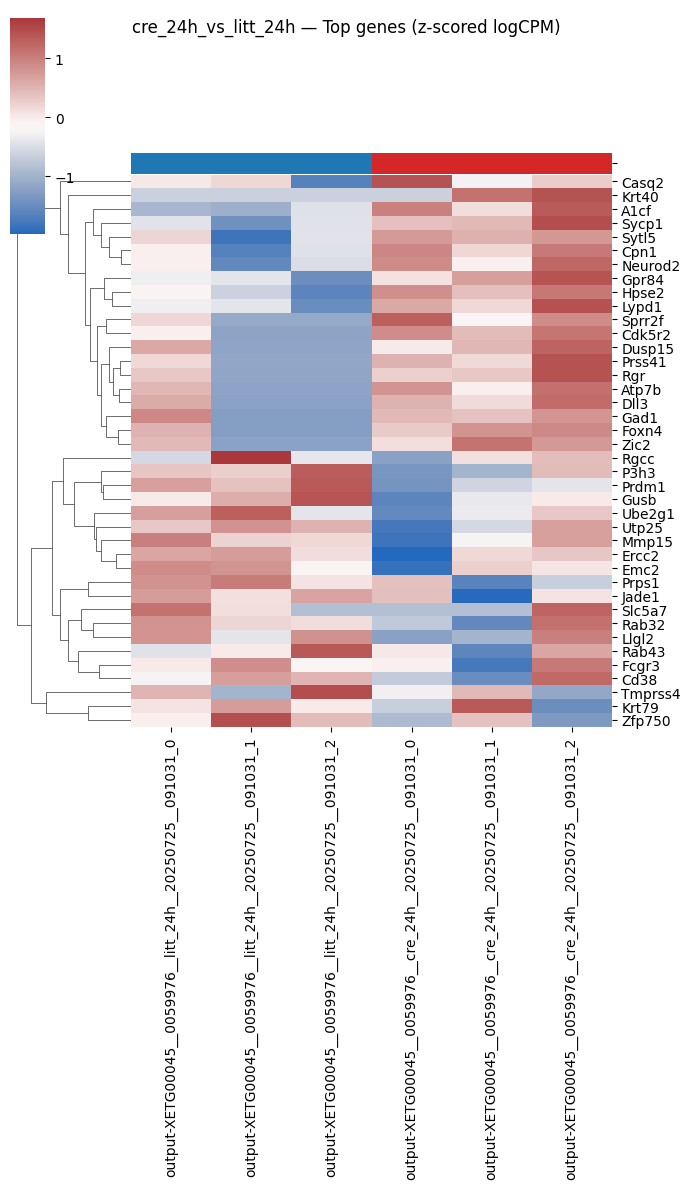

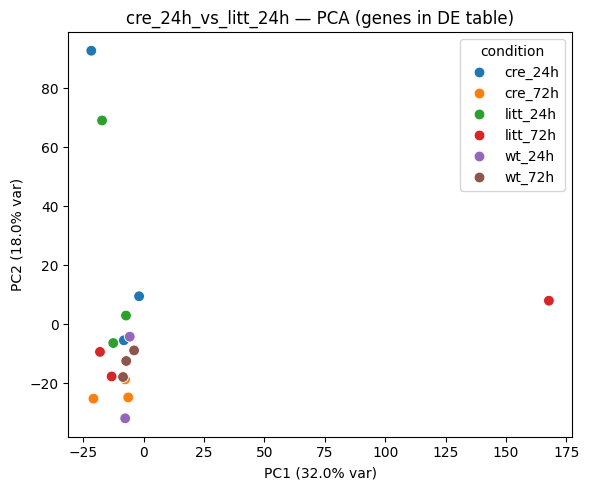

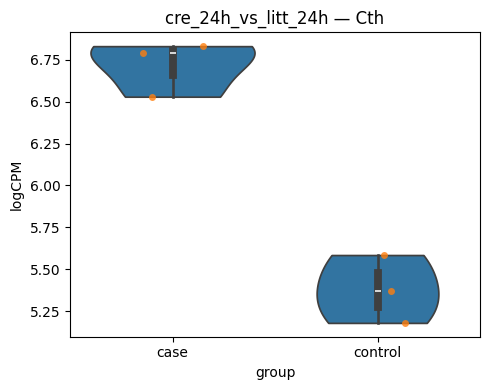

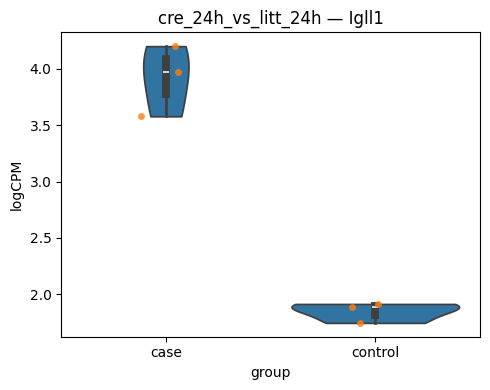

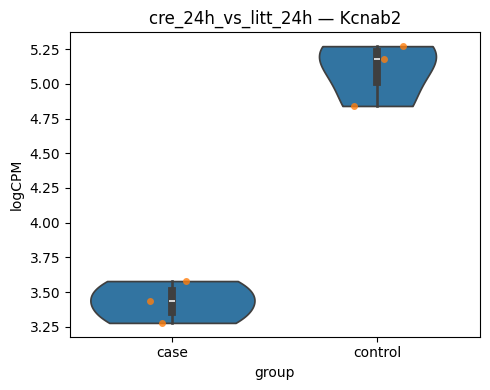

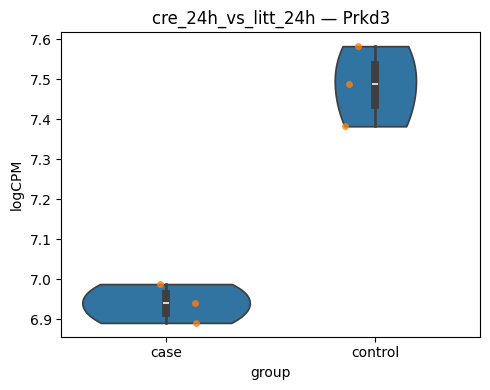

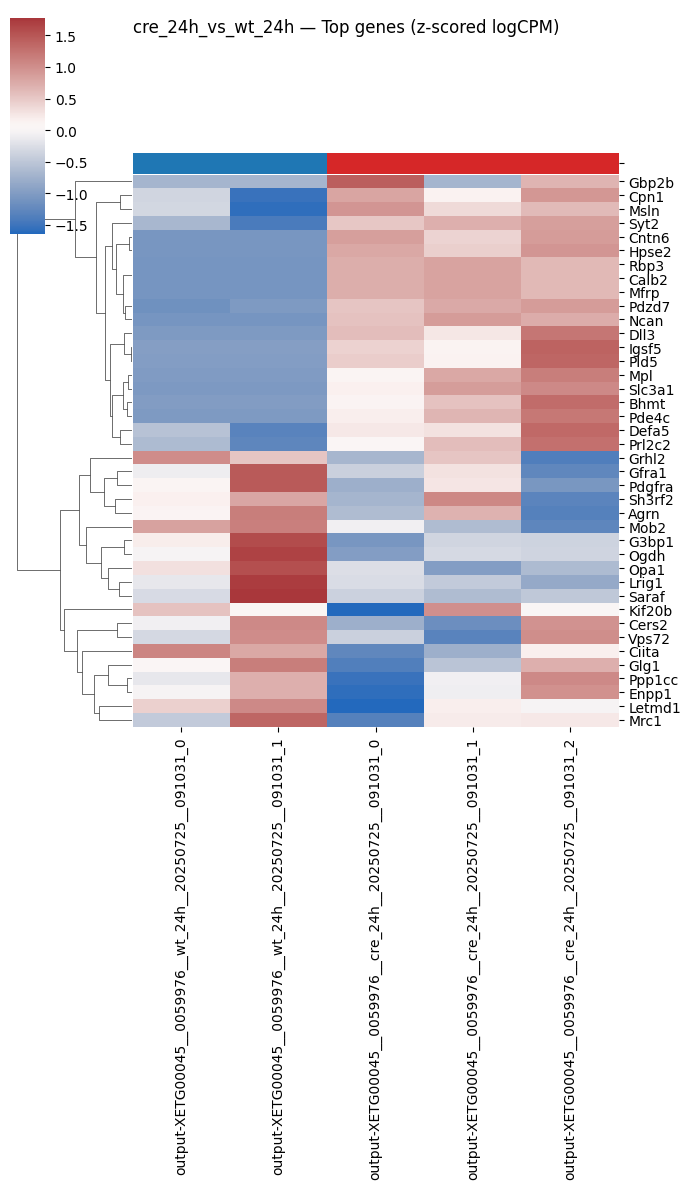

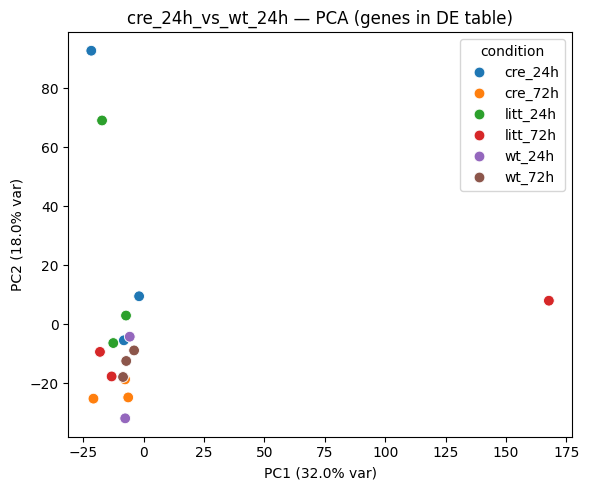

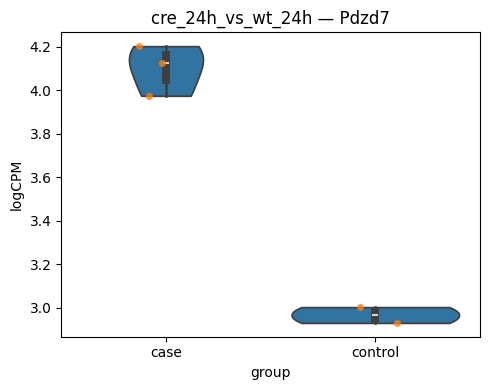

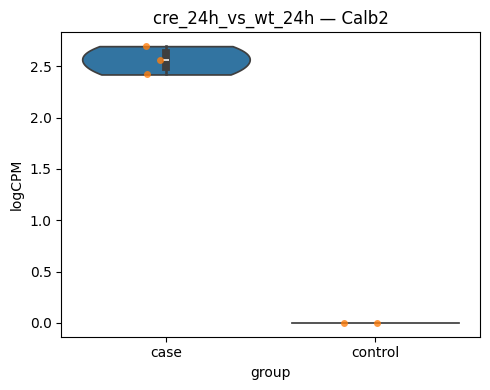

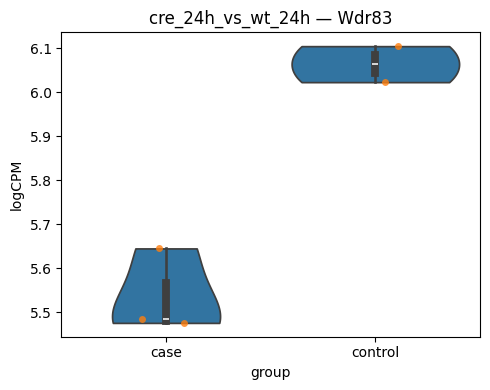

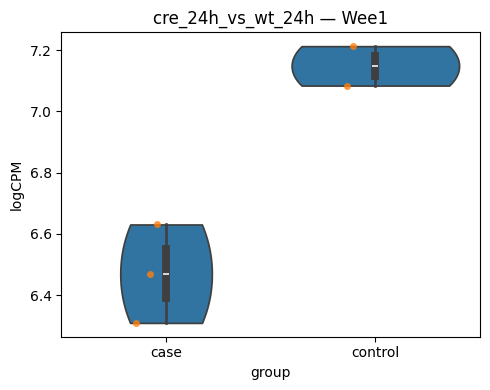

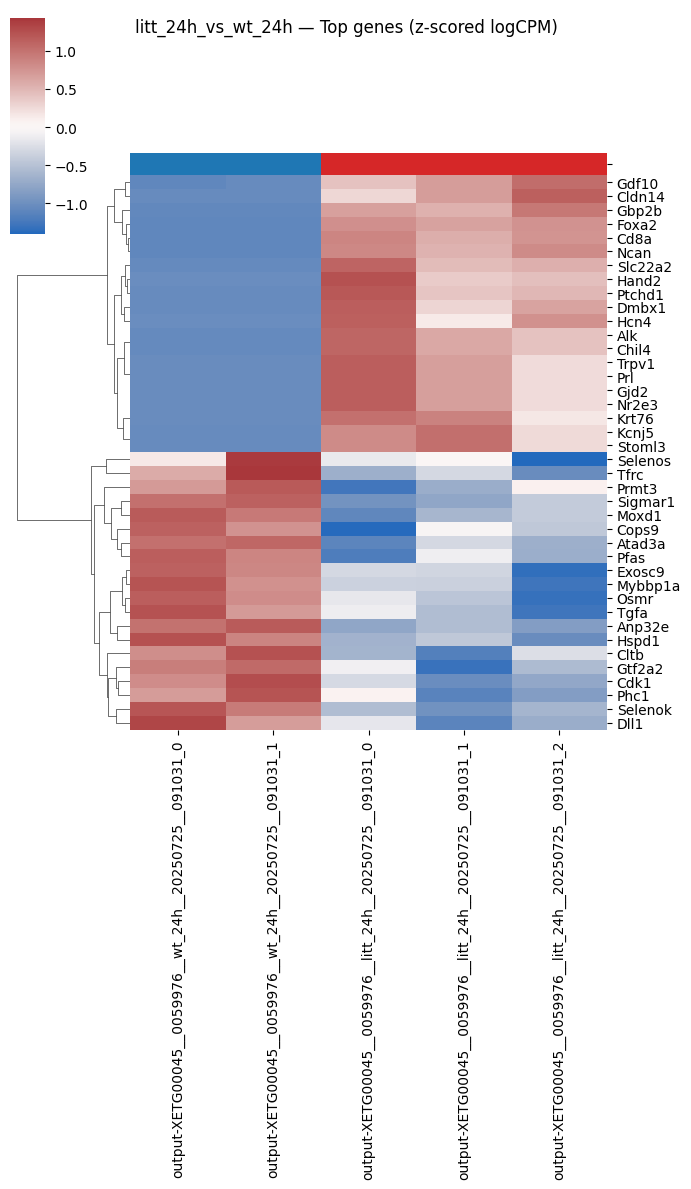

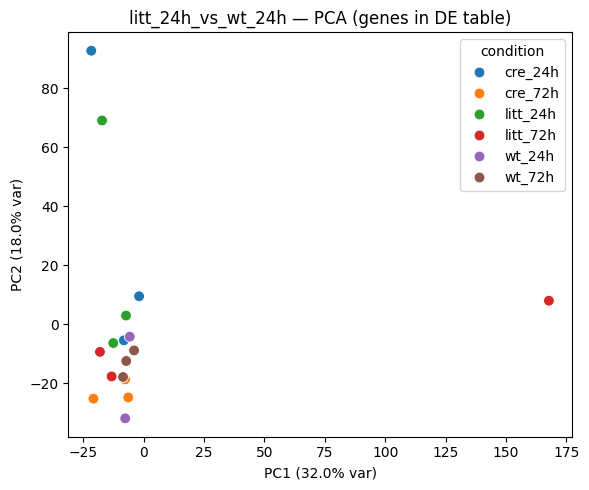

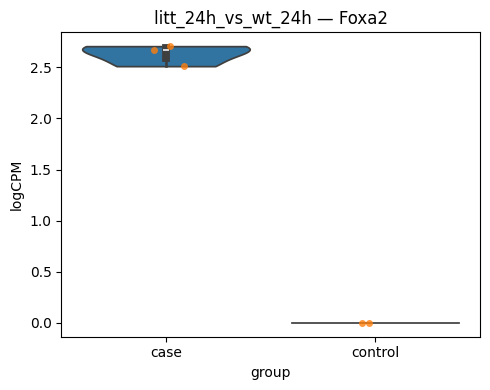

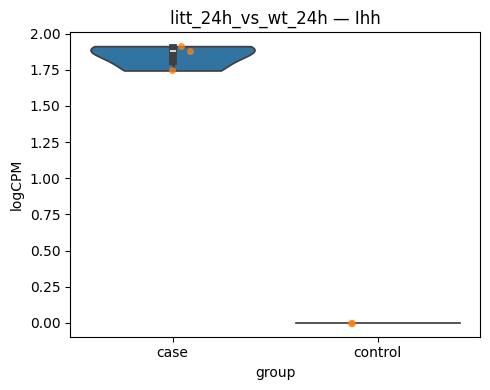

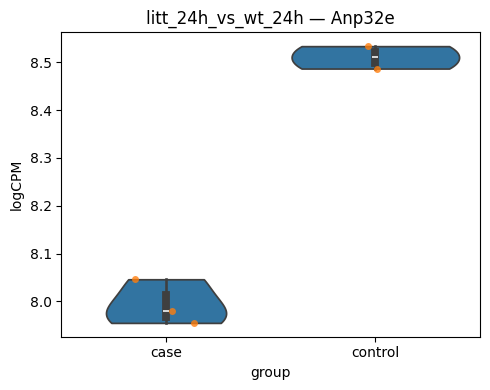

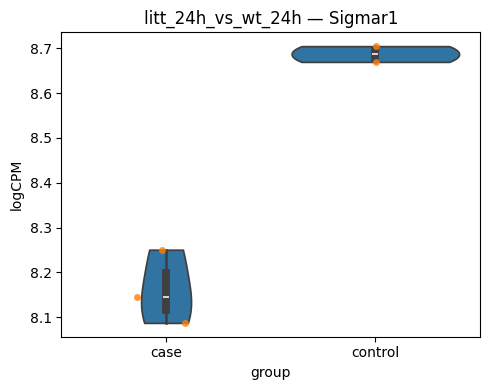

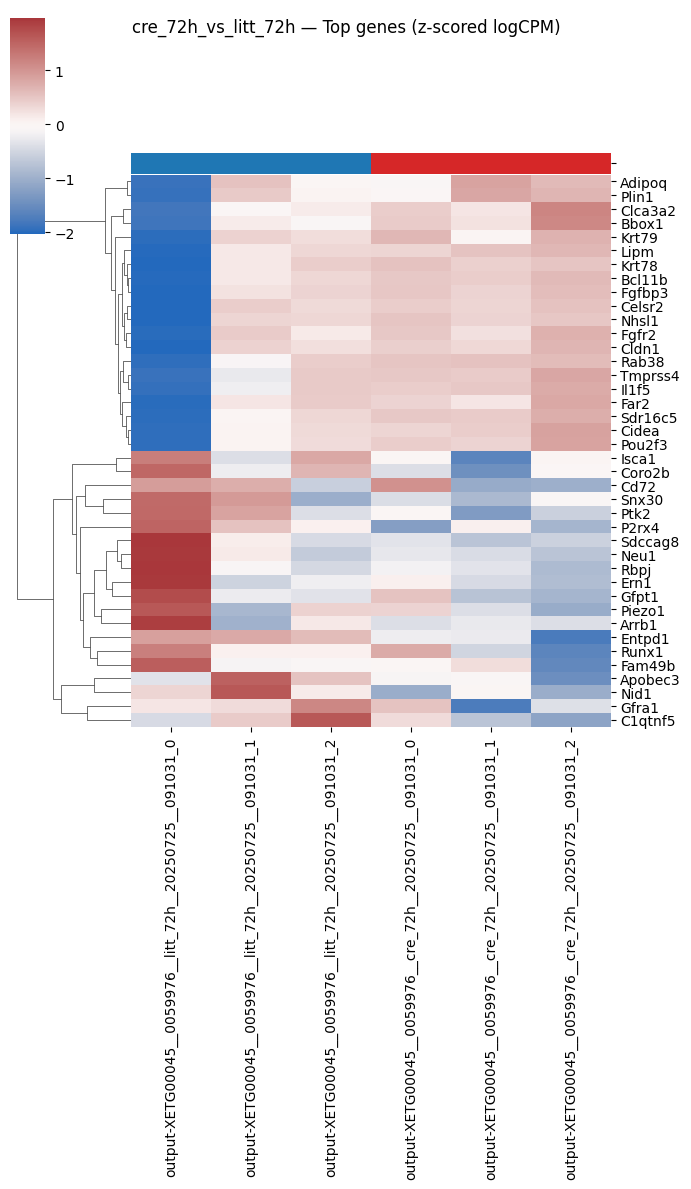

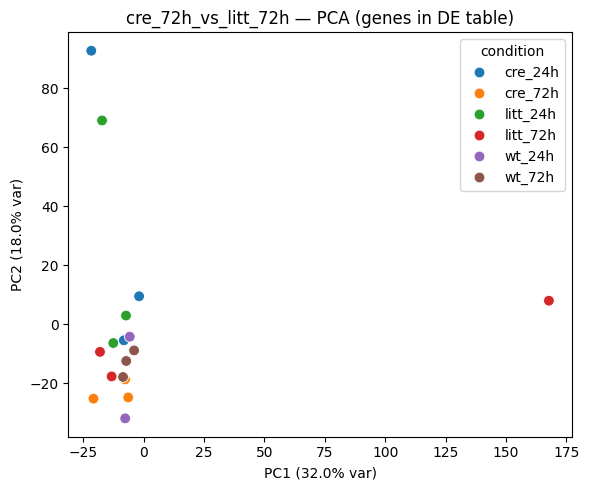

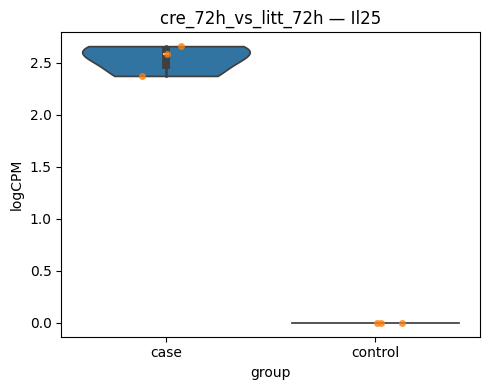

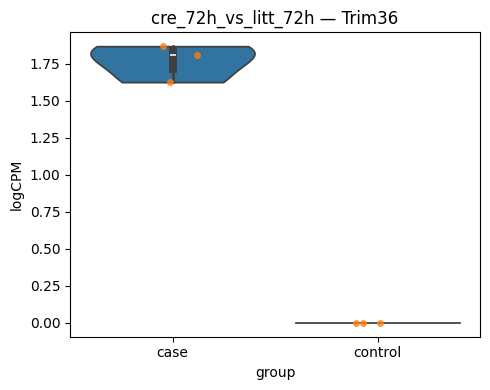

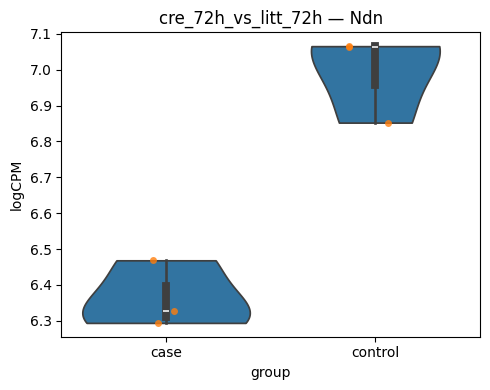

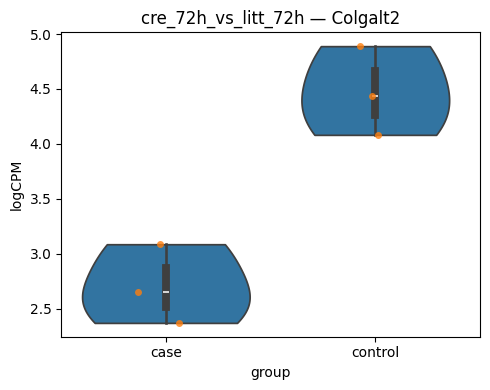

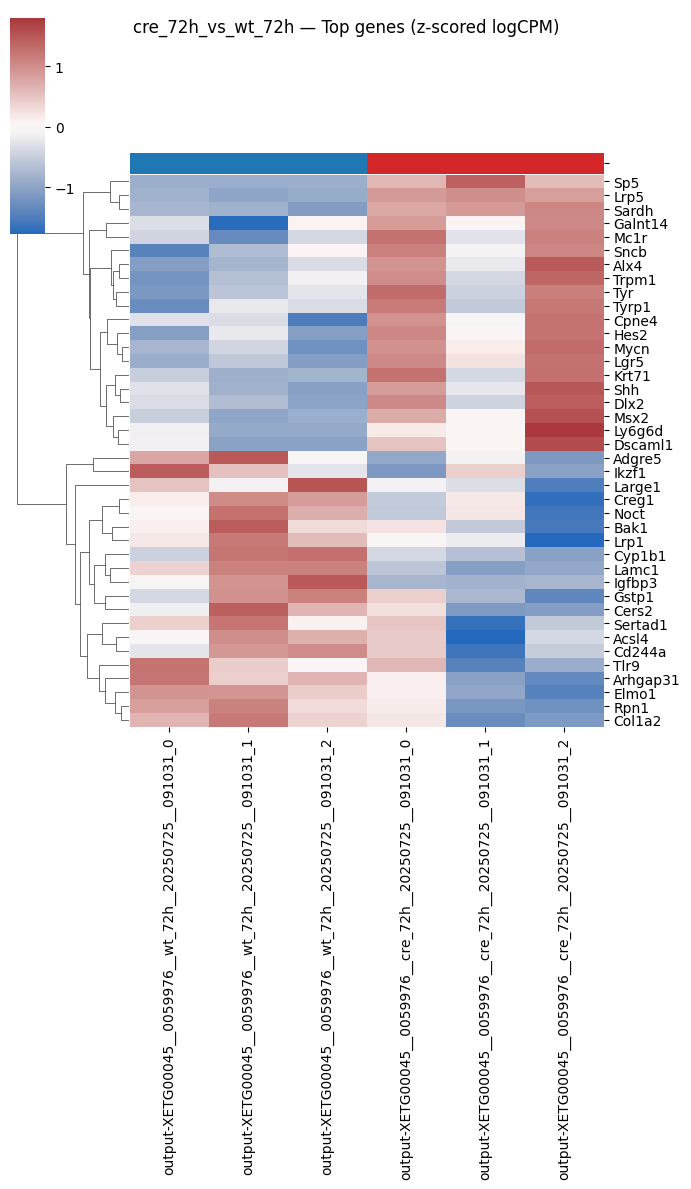

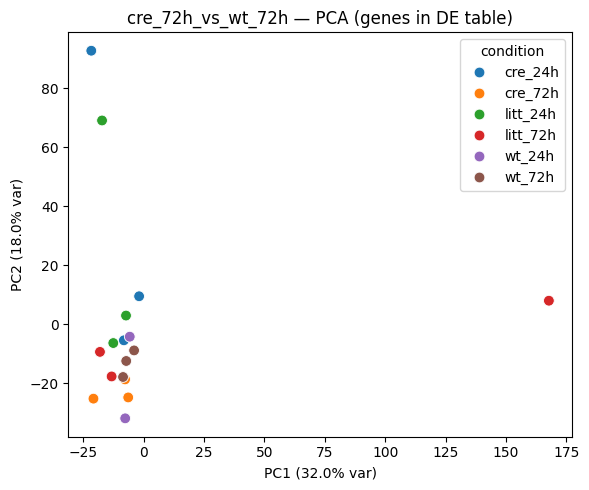

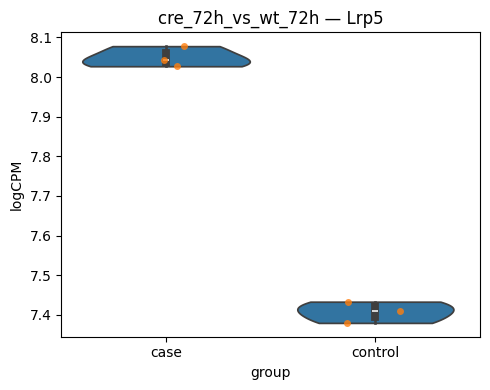

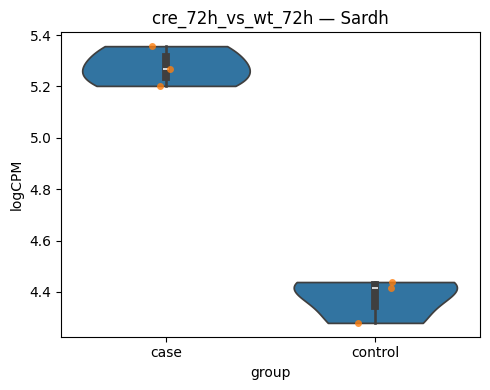

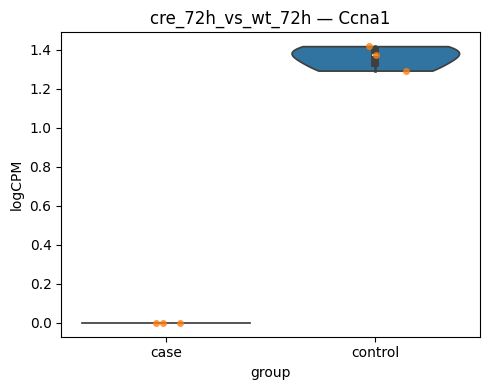

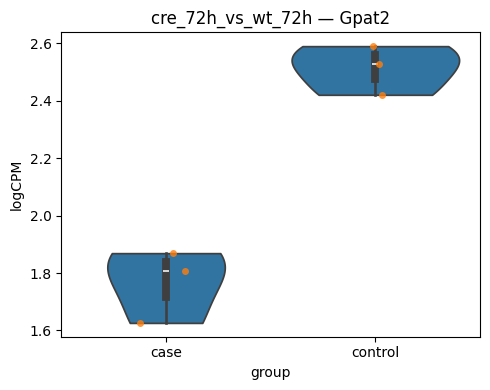

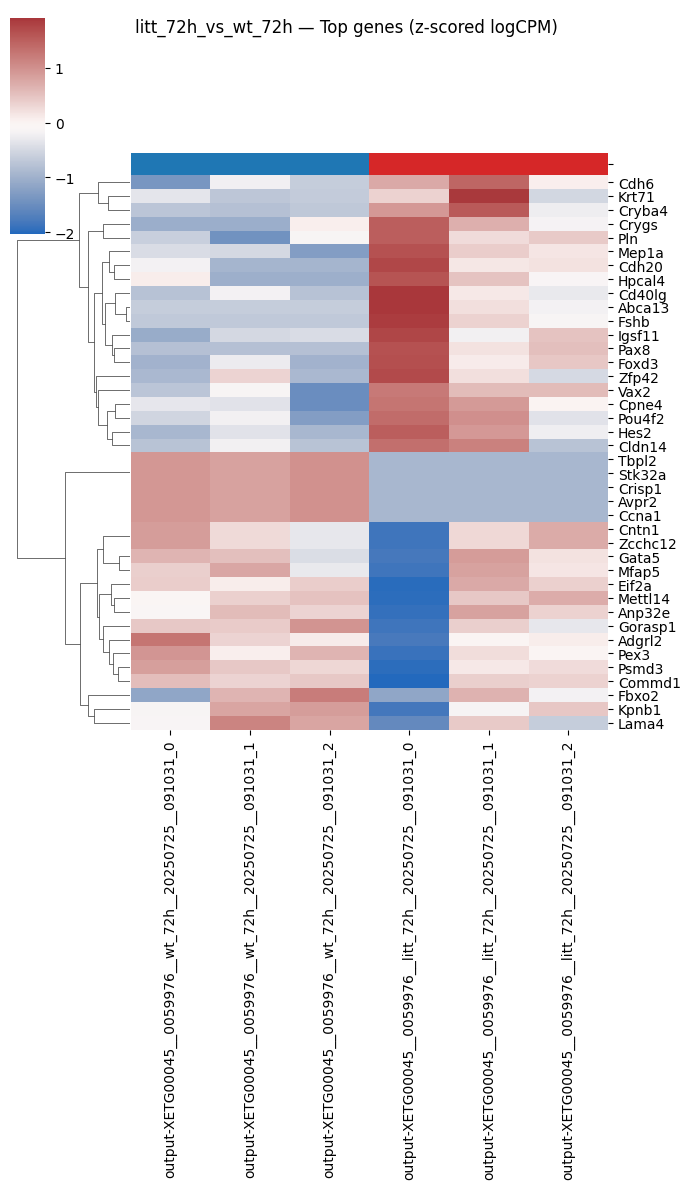

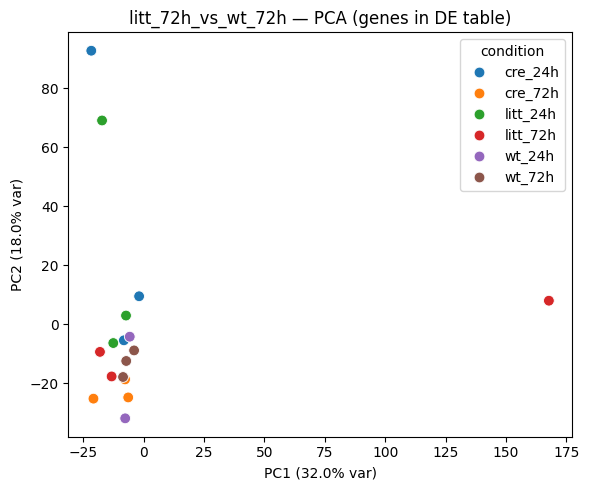

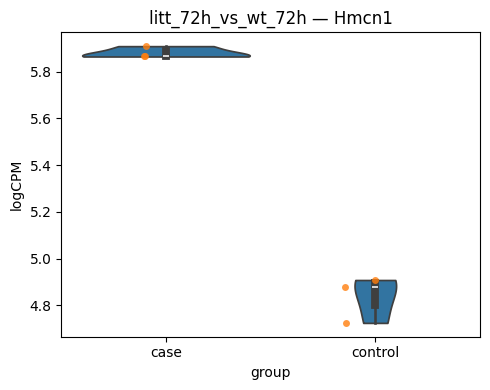

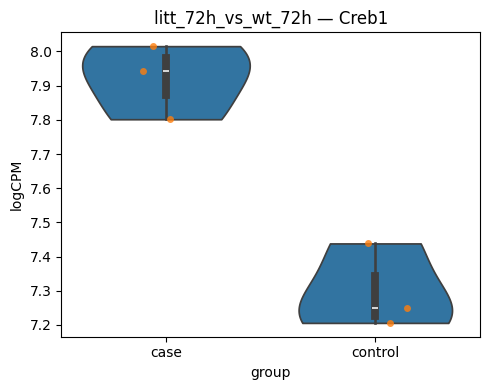

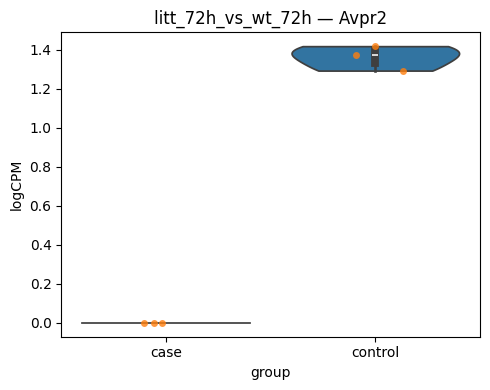

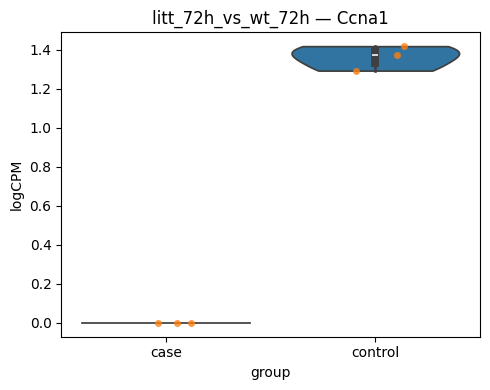

In [23]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# ---------- CONFIG ----------
FDR_THR  = 1
LFC_THR  = 0.5
TOP_N    = 20
FIGSIZE  = (6,5)

def _sig_mask(df, fdr_thr=FDR_THR, lfc_thr=LFC_THR):
    return (df["padj"] <= fdr_thr) & (df["log2fc"].abs() >= lfc_thr)

# ---------- VOLCANO ----------
def plot_volcano(de, title="", fdr_thr=FDR_THR, lfc_thr=LFC_THR, top_n=TOP_N, annotate=True):
    df = de.copy()
    # Handle filtered genes (padj NaN) by setting for plotting only
    df["padj_plot"] = df["padj"].fillna(1.0)
    df["neglog10_padj"] = -np.log10(df["padj_plot"].clip(lower=1e-300))

    sig = (df["padj_plot"] <= fdr_thr) & (df["log2fc"].abs() >= lfc_thr)

    plt.figure(figsize=FIGSIZE)
    plt.scatter(df.loc[~sig, "log2fc"], df.loc[~sig, "neglog10_padj"], s=8, alpha=0.4)
    plt.scatter(df.loc[sig,  "log2fc"], df.loc[sig,  "neglog10_padj"], s=10, alpha=0.85)

    plt.axvline(+lfc_thr, ls="--", lw=1, color="grey")
    plt.axvline(-lfc_thr, ls="--", lw=1, color="grey")
    plt.axhline(-np.log10(fdr_thr), ls="--", lw=1, color="grey")

    plt.xlabel("log2FC (case vs control)")
    plt.ylabel("-log10(FDR)")
    plt.title(title or "Volcano")

    if annotate:
        # label significant if any; else label top_n by raw p
        if sig.any():
            lab = df[sig].nsmallest(top_n, "padj_plot")
        else:
            lab = df.nsmallest(top_n, "pval")
        for g, r in lab.iterrows():
            plt.text(r["log2fc"], r["neglog10_padj"], g, fontsize=7, ha="left", va="bottom", alpha=0.8)

    plt.tight_layout()
    plt.show()

# ---------- MA ----------
def plot_ma(de, title="MA"):
    df = de.copy()
    df["A"] = (df["mean_logCPM_case"] + df["mean_logCPM_ctrl"]) / 2.0
    sig = _sig_mask(df)

    plt.figure(figsize=FIGSIZE)
    plt.scatter(df.loc[~sig,"A"], df.loc[~sig,"log2fc"], s=8, alpha=0.4)
    plt.scatter(df.loc[sig, "A"], df.loc[sig, "log2fc"], s=10, alpha=0.85)
    plt.axhline(0, ls="--", lw=1, color="grey")
    plt.xlabel("Mean logCPM")
    plt.ylabel("log2FC (case vs control)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ---------- HEATMAP (top DE genes) ----------
def plot_heatmap_top(de, logcpm_mat, sample_meta, case_conditions, ctrl_conditions,
                     top_n=TOP_N, title="Top DE genes (z-scored logCPM)"):
    df = de.copy()
    tested = df[~df["padj"].isna()]  # only genes actually tested

    if tested.empty:
        print("[info] No tested genes to display.")
        return

    # Prefer significant genes; else fallback to best by raw p
    candidates = tested[_sig_mask(tested)]
    if candidates.empty:
        candidates = tested.nsmallest(2*top_n, "pval")  # symmetric-ish size
    else:
        # take top_n up + top_n down by FDR then |LFC|
        up = candidates[candidates["log2fc"]>0].sort_values(["padj","log2fc"], ascending=[True,False]).head(top_n)
        dn = candidates[candidates["log2fc"]<0].sort_values(["padj","log2fc"], ascending=[True,False]).head(top_n)
        candidates = pd.concat([up, dn])

    genes = candidates.index.tolist()

    case_cols = sample_meta[sample_meta["condition"].isin(case_conditions)]["group_key"].tolist()
    ctrl_cols = sample_meta[sample_meta["condition"].isin(ctrl_conditions)]["group_key"].tolist()
    cols = ctrl_cols + case_cols  # controls first, then cases

    M = logcpm_mat.loc[genes, cols]
    Z = (M - M.mean(axis=1).values[:,None]) / (M.std(axis=1).values[:,None] + 1e-9)

    # condition color bar
    col_colors = pd.Series(index=cols, dtype="object")
    for c in ctrl_cols: col_colors[c] = "tab:blue"
    for c in case_cols: col_colors[c] = "tab:red"

    g = sns.clustermap(Z, row_cluster=True, col_cluster=False, cmap="vlag",
                       col_colors=col_colors[cols], figsize=(7,12))
    g.fig.suptitle(title)
    plt.show()

# ---------- PCA (samples) ----------
def plot_sample_pca(logcpm_mat, sample_meta, title="PCA (samples)"):
    X = logcpm_mat.T  # samples × genes
    Xc = X - X.mean(axis=0)
    pca = PCA(n_components=2, random_state=0).fit(Xc)
    PCs = pca.transform(Xc)
    dfp = pd.DataFrame(PCs, index=X.index, columns=["PC1","PC2"]).reset_index().rename(columns={"index":"group_key"})
    dfp = dfp.merge(sample_meta[["group_key","condition"]], on="group_key", how="left")

    plt.figure(figsize=FIGSIZE)
    sns.scatterplot(data=dfp, x="PC1", y="PC2", hue="condition", s=60)
    ve = pca.explained_variance_ratio_ * 100
    plt.xlabel(f"PC1 ({ve[0]:.1f}% var)")
    plt.ylabel(f"PC2 ({ve[1]:.1f}% var)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ---------- Per-gene violin ----------
def plot_gene_violin(gene, logcpm_mat, sample_meta, case_conditions, ctrl_conditions, title=None):
    case_cols = sample_meta[sample_meta["condition"].isin(case_conditions)]["group_key"].tolist()
    ctrl_cols = sample_meta[sample_meta["condition"].isin(ctrl_conditions)]["group_key"].tolist()

    data = []
    for c in case_cols:
        data.append({"group":"case", "value": logcpm_mat.at[gene, c], "sample": c})
    for c in ctrl_cols:
        data.append({"group":"control", "value": logcpm_mat.at[gene, c], "sample": c})
    df = pd.DataFrame(data)

    plt.figure(figsize=(5,4))
    sns.violinplot(data=df, x="group", y="value", inner="box", cut=0)
    sns.stripplot(data=df, x="group", y="value", alpha=0.8, jitter=0.15)
    plt.ylabel("logCPM")
    plt.title(title or gene)
    plt.tight_layout()
    plt.show()

# ---------- Driver to render a full panel for ONE comparison ----------
def visualize_comparison(name, results, sample_meta, logcpm_mat, comparisons,
                         fdr_thr=FDR_THR, lfc_thr=LFC_THR, top_n=TOP_N, show_example_violins=True):
    de = results[name]
    case_conds = comparisons[name]["case"]
    ctrl_conds = comparisons[name]["control"]

    # Volcano / MA
    #plot_volcano(de, title=f"{name} — Volcano", fdr_thr=fdr_thr, lfc_thr=lfc_thr, top_n=top_n)
    #plot_ma(de, title=f"{name} — MA")

    # Heatmap (top genes)
    plot_heatmap_top(de, logcpm_mat, sample_meta, case_conds, ctrl_conds,
                     top_n=top_n, title=f"{name} — Top genes (z-scored logCPM)")

    # PCA
    plot_sample_pca(logcpm_mat.loc[de.index], sample_meta, title=f"{name} — PCA (genes in DE table)")

    # Example violins
    if show_example_violins:
        tested = de[~de["padj"].isna()]
        if tested.empty:
            return
        sig = tested[_sig_mask(tested, fdr_thr, lfc_thr)]
        if sig.empty:
            genes_to_show = tested.nsmallest(3, "pval").index.tolist()
        else:
            genes_to_show = pd.concat([
                sig[sig["log2fc"]>0].head(2),
                sig[sig["log2fc"]<0].head(2)
            ]).index.unique().tolist()
        for g in genes_to_show:
            plot_gene_violin(g, logcpm_mat, sample_meta, case_conds, ctrl_conds, title=f"{name} — {g}")

# ---------- Usage ----------
# Single comparison:
# visualize_comparison("Pdl1_wt+C57_vs_Pdl1_cre", results, sample_meta, logcpm_mat, comparisons)

# Or loop all:
for comp_name in comparisons:
     visualize_comparison(comp_name, results, sample_meta, logcpm_mat, comparisons)

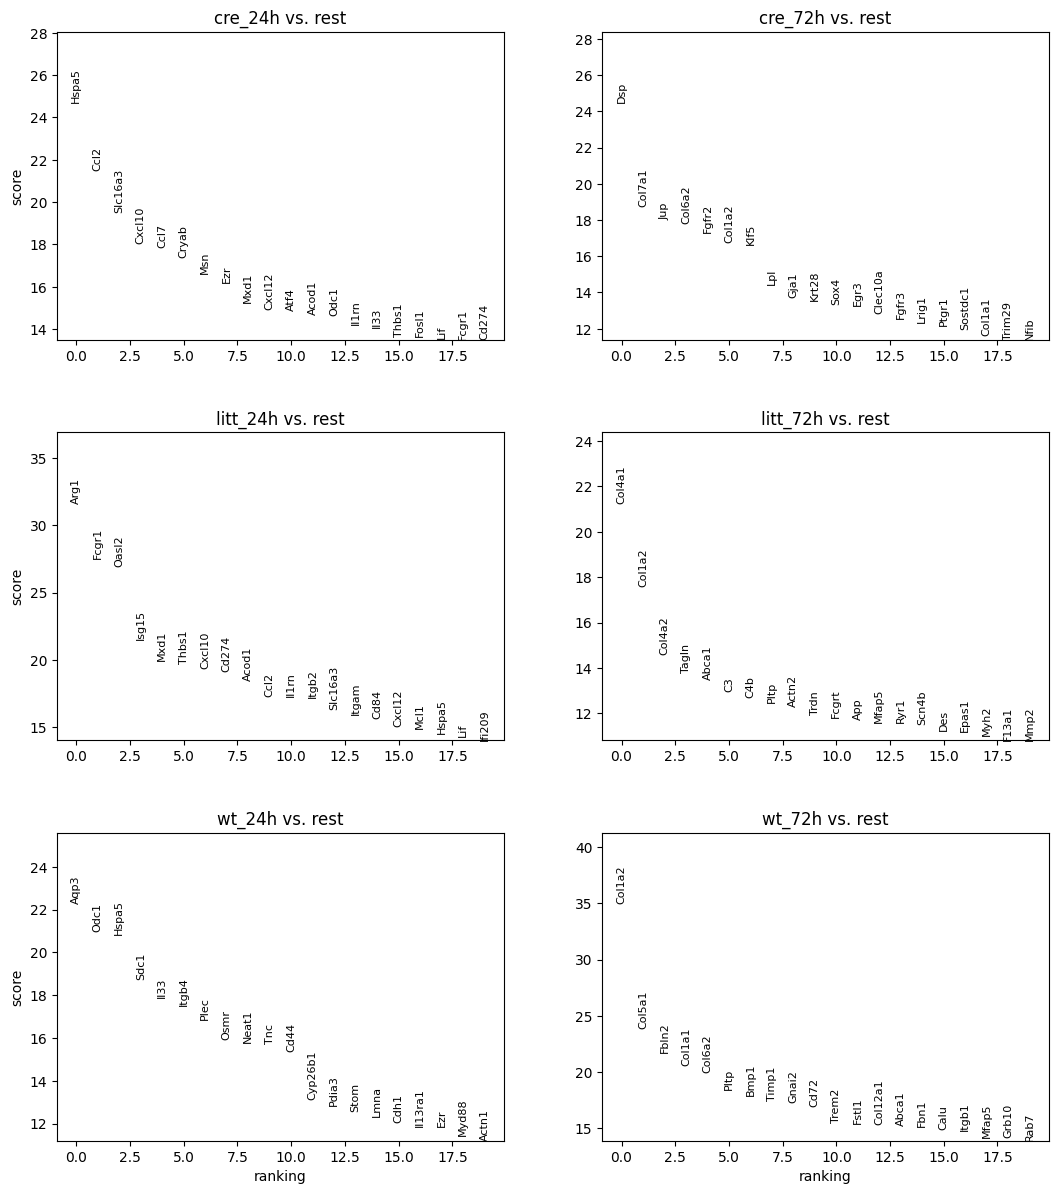

In [26]:
# Run DE between groups in adata.obs["condition"]
sc.tl.rank_genes_groups(
    ad,
    groupby="condition",          # column in .obs
    method="t-test",              # or "wilcoxon" / "logreg"
)

# Inspect results
sc.pl.rank_genes_groups(ad, n_genes=20, sharey=False, ncols= 2)


=== cre_24h_vs_litt_24h ===
      gene  logfoldchange          pval      pval_adj
0    Hspa5       0.493669  1.746032e-19  8.740638e-16
1     Atf4       0.611589  5.411142e-17  1.354409e-13
2    Itgb1       0.501813  4.198424e-16  7.005770e-13
3      Ezr       0.584588  1.627312e-14  2.036581e-11
4     Il33       0.857436  6.476451e-14  5.403519e-11
5     Aqp3       1.122031  6.956298e-13  4.974746e-10
6    Cryab       1.344642  3.634623e-10  1.654084e-07
7  Slc16a3       0.331011  1.040078e-08  3.719023e-06
8      Msn       0.226742  1.274277e-08  4.252686e-06
9    Aldoa       0.420563  2.134569e-08  6.678532e-06


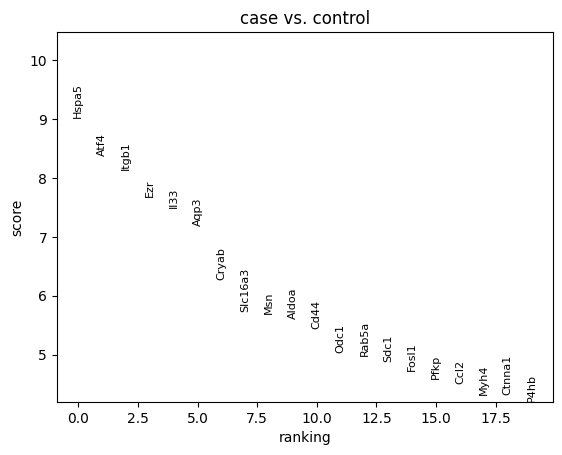


=== cre_24h_vs_wt_24h ===
      gene  logfoldchange          pval      pval_adj
0  Slc16a3       1.962593  6.887466e-53  3.447866e-49
1     Arg1       2.617505  1.430682e-20  1.432399e-17
2     Mxd1       1.374181  2.308146e-15  1.444322e-12
3      Msn       0.422256  1.021065e-14  5.679392e-12
4     Ccl2       1.428758  2.570154e-14  1.286619e-11
5   Cxcl10       2.745691  5.743841e-12  2.396139e-09
6    Thbs1       1.507069  3.262960e-10  1.088959e-07
7    Fcgr1       1.246972  6.083368e-10  1.903334e-07
8      App       0.367117  9.616810e-10  2.674542e-07
9     Cd84       2.574623  8.282423e-09  1.727575e-06


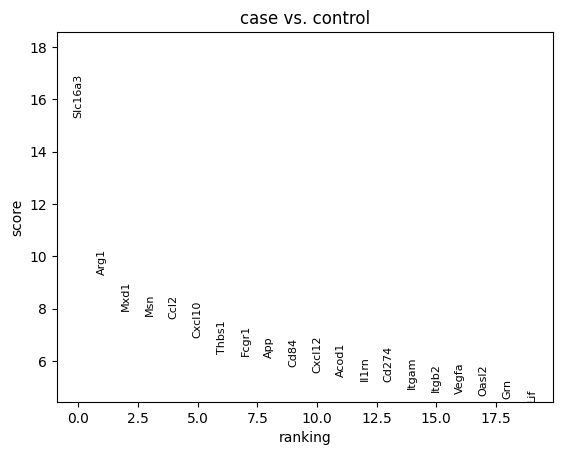


=== litt_24h_vs_wt_24h ===
      gene  logfoldchange          pval      pval_adj
0     Arg1       3.337703  6.822203e-57  3.415195e-53
1      Grn       0.877992  7.782563e-31  6.493251e-28
2  Slc16a3       1.631582  8.759575e-28  5.578881e-25
3    Fcgr1       1.607597  2.824728e-24  1.285508e-21
4    Oasl2       1.204896  4.971135e-18  1.382528e-15
5     Mxd1       1.323381  2.384702e-16  5.684675e-14
6    Itgb2       1.458295  1.128910e-14  2.260530e-12
7    Thbs1       1.515890  3.848143e-14  7.409155e-12
8    Itgam       1.119621  1.420489e-13  2.452058e-11
9      App       0.363715  3.514593e-13  5.675501e-11


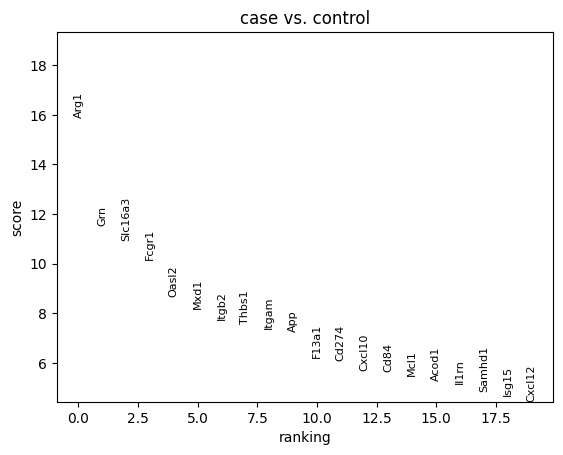


=== cre_72h_vs_litt_72h ===
     gene  logfoldchange          pval      pval_adj
0     Dsp       0.813430  5.059146e-39  2.532608e-35
1    Klf5       0.901533  7.645584e-15  3.189483e-12
2     Jup       0.586583  3.442683e-12  1.077129e-09
3    Lmna       0.225106  9.210916e-08  1.707772e-05
4   Fgfr2       0.831789  2.385596e-07  3.852353e-05
5  Col7a1       0.716011  4.323356e-07  6.558401e-05
6    Gja1       0.346858  7.726630e-07  1.017882e-04
7   Dsg1b       0.503391  2.492598e-06  2.835897e-04
8    Cdh1       0.527896  4.670262e-06  4.870694e-04
9   Fgfr3       0.642028  9.554650e-06  8.696469e-04


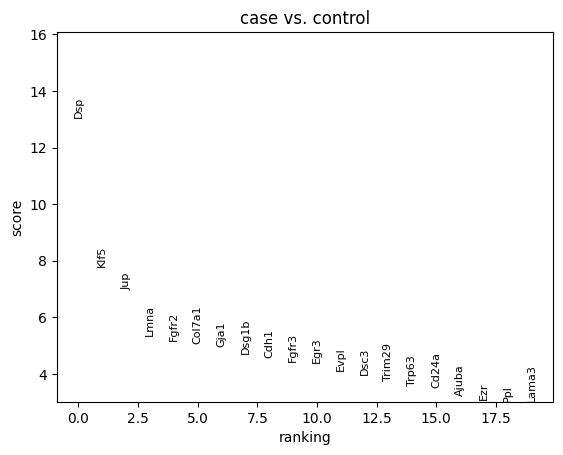


=== cre_72h_vs_wt_72h ===
    gene  logfoldchange          pval      pval_adj
0    Dsp       0.666884  5.327014e-44  1.333352e-40
1   Gja1       0.662440  1.036249e-22  5.763845e-20
2    Jup       0.561750  4.847089e-20  2.022044e-17
3  Fgfr2       1.273811  4.746773e-16  1.485146e-13
4  Fgfr3       0.849810  4.323383e-13  1.030612e-10
5   Klf5       0.594806  7.543481e-12  1.573444e-09
6   Egr3       0.785048  3.551990e-10  5.735891e-08
7   Dsc3       0.467952  1.033359e-08  1.398107e-06
8   Bcam       0.898595  1.442952e-08  1.900900e-06
9   Nfib       0.562845  3.758506e-08  4.589044e-06


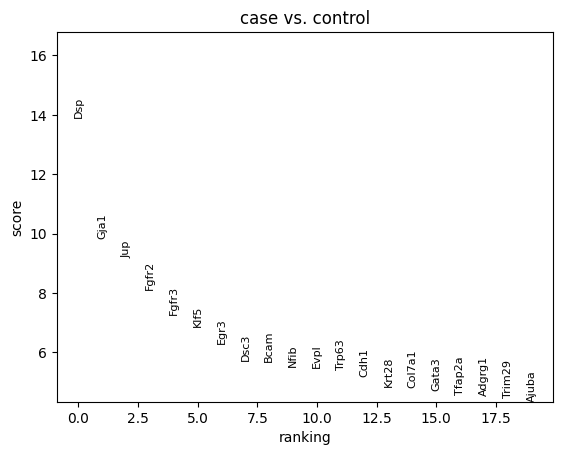


=== litt_72h_vs_wt_72h ===
     gene  logfoldchange          pval      pval_adj
0  Col4a1       0.465950  9.299096e-28  4.655127e-24
1     App       0.212779  1.716374e-14  1.718434e-11
2     C4b       0.941430  3.051788e-13  1.909656e-10
3  Slc2a4       0.541167  2.802058e-11  1.275191e-08
4   Ifit3       0.488643  7.373426e-10  2.839336e-07
5   Cxxc1       0.335075  8.044218e-09  2.876383e-06
6    Myh4       0.937794  2.062646e-08  6.883738e-06
7    Bcam       0.787977  1.170235e-07  3.445999e-05
8   Rsrp1       0.203314  2.457219e-07  6.474126e-05
9   Rab5a       0.683922  2.682435e-07  6.714134e-05


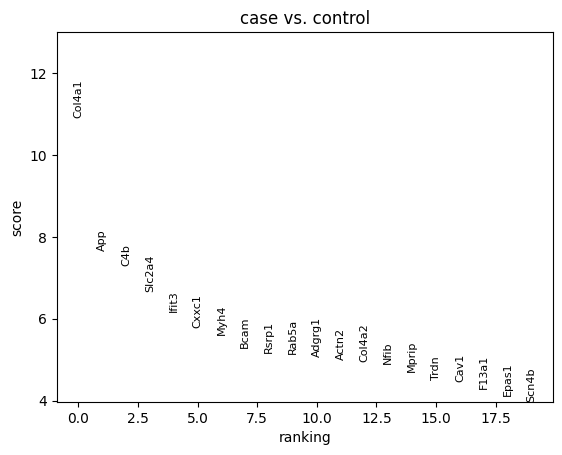

In [27]:
import scanpy as sc
import pandas as pd

results_scanpy = {}

for name, spec in comparisons.items():
    case_conditions = spec["case"]
    ctrl_conditions = spec["control"]

    # Make a temporary grouping column in .obs
    ad.obs["group_DE"] = "rest"
    ad.obs.loc[ad.obs["condition"].isin(case_conditions), "group_DE"] = "case"
    ad.obs.loc[ad.obs["condition"].isin(ctrl_conditions), "group_DE"] = "control"

    # Subset only case + control cells
    ad_sub = ad[ad.obs["group_DE"].isin(["case","control"])].copy()

    # Run DE
    sc.tl.rank_genes_groups(
        ad_sub,
        groupby="group_DE",
        method="wilcoxon",      # or "t-test"
        reference="control"     # always compare case vs control
    )

    # Save results to a tidy DataFrame
    de_res = ad_sub.uns["rank_genes_groups"]
    case_group = "case"

    df = pd.DataFrame({
        "gene": de_res["names"][case_group],
        "logfoldchange": de_res["logfoldchanges"][case_group],
        "pval": de_res["pvals"][case_group],
        "pval_adj": de_res["pvals_adj"][case_group],
    })
    results_scanpy[name] = df

    print(f"\n=== {name} ===")
    print(df.head(10))

    # Quick plot for top genes
    sc.pl.rank_genes_groups(ad_sub, n_genes=20, sharey=False, ncols=2, title=name)

In [28]:
def nice_volcano(
    df,
    title="",
    fdr_thr=0.05,
    lfc_thr=0.5,
    top_n_each=10,
    max_nonsig_points=8000,
    y_cap_quantile=0.99,
    xlim=None,               # <-- NEW: pass a tuple like (-3, 3)
    savepath=None,
):
    df = df.copy()

    # choose p-values (prefer adj)
    if "pval_adj" in df.columns and df["pval_adj"].notna().any():
        p = df["pval_adj"].astype(float)
        y_label = "-log10(FDR)"
    elif "pval" in df.columns:
        p = df["pval"].astype(float)
        y_label = "-log10(p)"
    else:
        raise ValueError("Need 'pval_adj' or 'pval' in df.")

    tiny = np.nextafter(0, 1)
    p = p.replace([np.inf, -np.inf], np.nan).fillna(1.0).clip(tiny, 1.0)
    df["logFC"] = df["logfoldchange"].astype(float)
    df["neglog10p"] = -np.log10(p.values)

    sig = (p.values <= fdr_thr) & (np.abs(df["logFC"].values) >= lfc_thr)

    y_cap = np.quantile(df["neglog10p"], y_cap_quantile)
    y_cap = max(y_cap, -np.log10(fdr_thr) + 1)
    df["yplot"] = np.minimum(df["neglog10p"], y_cap)

    # downsample non-significant
    nonsig_idx = np.where(~sig)[0]
    if len(nonsig_idx) > max_nonsig_points:
        keep_ns = rng.choice(nonsig_idx, size=max_nonsig_points, replace=False)
        show_idx = np.concatenate([keep_ns, np.where(sig)[0]])
    else:
        show_idx = np.arange(len(df))

    plt.figure(figsize=(6.5, 5.2))
    shown = df.iloc[show_idx]

    plt.scatter(shown.loc[~shown.index.isin(df.index[sig]), "logFC"],
                shown.loc[~shown.index.isin(df.index[sig]), "yplot"],
                s=8, alpha=0.35, linewidths=0, zorder=1)
    plt.scatter(df.loc[sig, "logFC"], df.loc[sig, "yplot"],
                s=14, alpha=0.9, linewidths=0, zorder=2)

    # thresholds
    plt.axvline(+lfc_thr, ls="--", lw=1, color="tab:blue", alpha=0.7)
    plt.axvline(-lfc_thr, ls="--", lw=1, color="tab:blue", alpha=0.7)
    plt.axhline(-np.log10(fdr_thr), ls="--", lw=1, color="tab:blue", alpha=0.7)

    # axis limits
    if xlim is not None:
        plt.xlim(xlim)
    else:
        xq = np.quantile(np.abs(df["logFC"]), 0.995)
        lim = max(xq, lfc_thr * 1.2)
        plt.xlim(-lim, lim)
    plt.ylim(0, y_cap * 1.05)

    plt.xlabel("logFC (case vs control)")
    plt.ylabel(y_label)
    plt.title(title, pad=10)
    plt.grid(True, which="major", ls=":", lw=0.5, alpha=0.4)

    # label top genes
    if top_n_each and len(df) > 0:
        cand = df[sig] if sig.any() else df
        up = cand[cand["logFC"] > 0].nsmallest(top_n_each, "pval_adj" if "pval_adj" in df.columns else "pval")
        dn = cand[cand["logFC"] < 0].nsmallest(top_n_each, "pval_adj" if "pval_adj" in df.columns else "pval")
        lab = pd.concat([up, dn]).drop_duplicates()
        for _, r in lab.iterrows():
            plt.text(r["logFC"], min(r["yplot"] + 0.02 * y_cap, y_cap * 1.02),
                     r["gene"], fontsize=7, ha="center", va="bottom",
                     bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6))

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=200, bbox_inches="tight")
    plt.show()

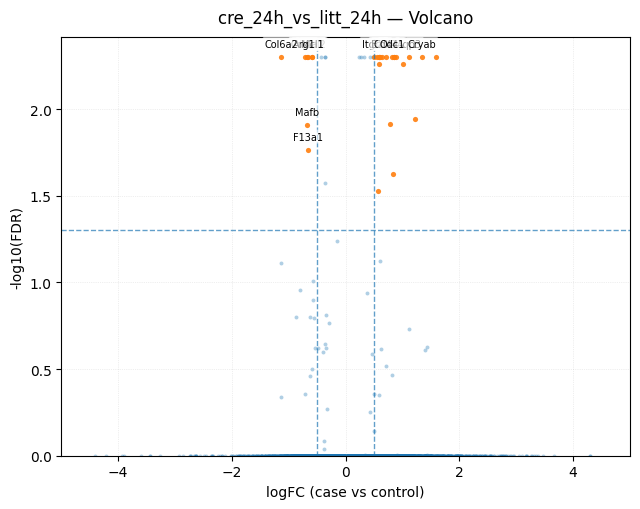

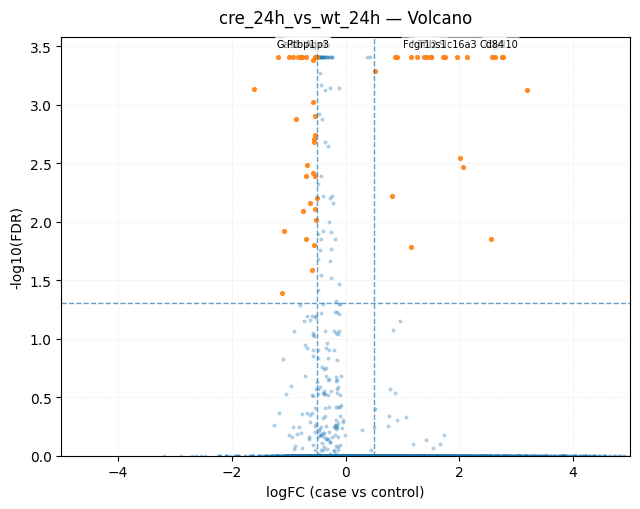

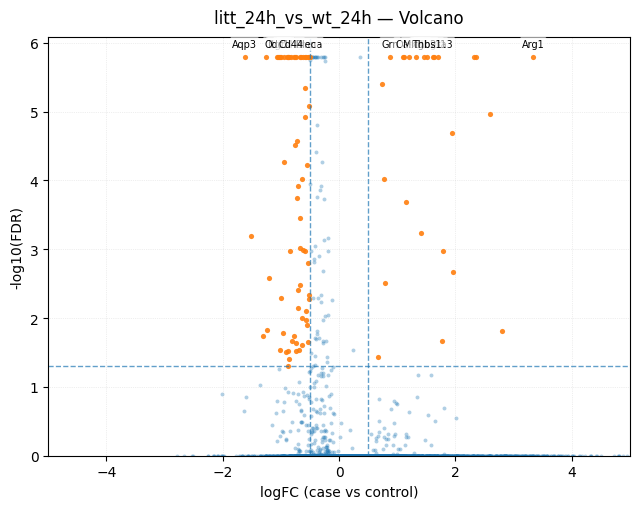

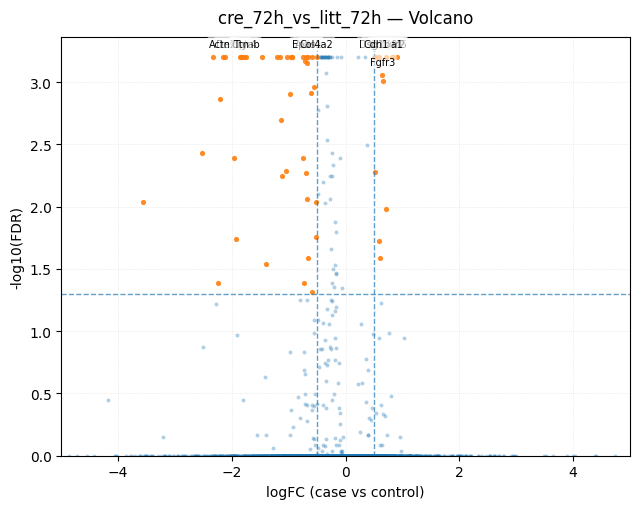

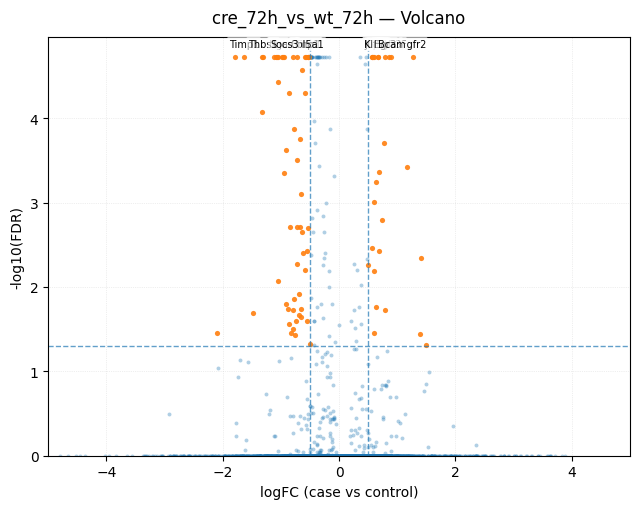

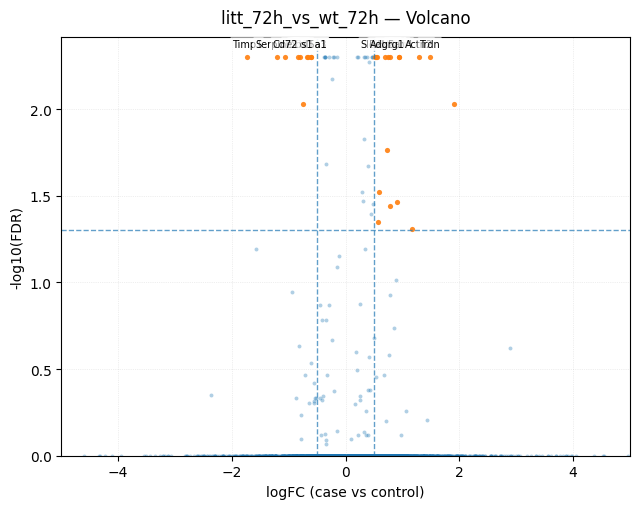

In [29]:
for name, df in results_scanpy.items():
    nice_volcano(
        df,
        title=f"{name} — Volcano",
        fdr_thr=0.05,
        lfc_thr=0.5,
        xlim=(-5, 5),   # <-- cut the x-axis here
        top_n_each=8
    )